In [1]:
# Tweepy
!pip install tweepy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import nltk
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize, pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [3]:
# Enter consumer key and consumer secret
consumer_key = input("Enter the consumer key:")
consumer_secret = input("Enter the consumer secret:")

Enter the consumer key:hk341QzVCNAQHP3TvulC479eI
Enter the consumer secret:0hvExjtTaHf5jjVnB3fIUPeTylrX6oQEBbEqcTLYEk3iaCR0eA


In [70]:
def get_entities(text):
    entities = []
    for sent in nltk.sent_tokenize(text):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return entities
    
def generate_wordcloud(text):
    wordcloud = WordCloud(max_font_size=50).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [4]:
auth = tweepy.OAuthHandler(
   consumer_key, consumer_secret
)

api = tweepy.API(auth)

In [27]:
# Search for a screen name (returns default of 20 results)
screen_name=input("Enter the screen name for the user you're searching: ")
try:
    user = api.get_user(screen_name=screen_name)
    timeline_results = user.timeline(tweet_mode="extended", count=20)
    results = []
    for t in timeline_results:
        date = t.created_at
        user = t.user.name
        if "retweeted_status" in dir(t):
            text = t.retweeted_status.full_text
        else:
            text = t.full_text
        results.append((user, date, text))
    df = pd.DataFrame(results, columns=['User', 'Date', 'Full Text'])
except Exception as e: 
    print(e)

In [66]:
# Get a list of entity types
df['Entities'] = df['Full Text'].apply(lambda x: get_entities(x))
all_entities = df['Entities'].to_list()
entity_types = [i for j in all_entities for i in j]
entity_types = list(set([e[0] for e in entity_types]))
entity_types.insert(0, "ALL")

Enter a filter type (['ALL', 'GPE', 'PERSON', 'ORGANIZATION']): PERSON


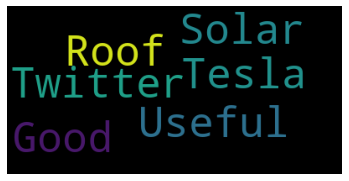

<Figure size 432x288 with 0 Axes>

In [69]:
# Filter the entities that are used to create the wordcloud
filter_type = input(f"Enter a filter type ({entity_types}): ")

# Generate the wordcloud
if filter_type == "ALL":
    entities = [[entity[1] for entity in entities] for entities in all_entities]
else:
    entities = [[entity[1] for entity in entities if entity[0] == filter_type] for entities in all_entities]
text = ' '.join([i for j in entities for i in j])
generate_wordcloud(text)